Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.

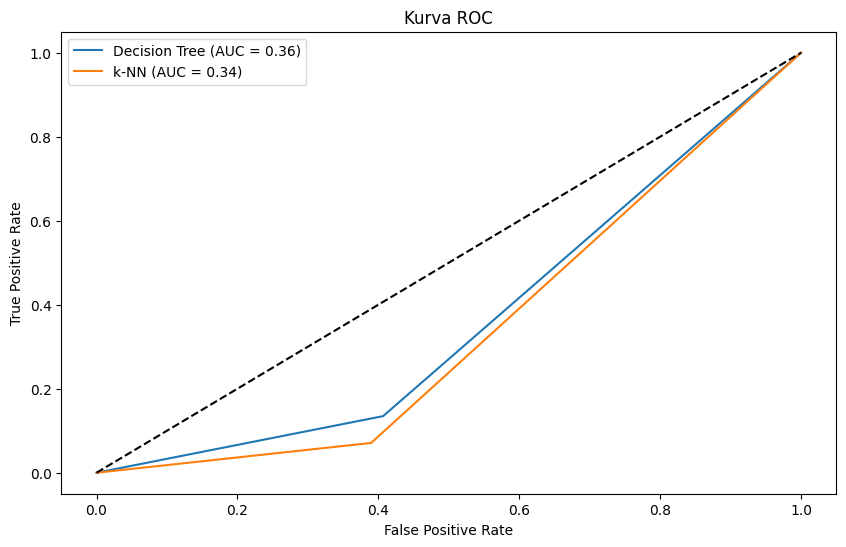

In [5]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Memuat dataset
file_path = '/content/CreditDataset.csv'  # Path file dataset (gunakan path yang sesuai)
df = pd.read_csv(file_path)

# Eksplorasi awal dataset
print("Informasi Dataset:")
print(df.info())  # Menampilkan tipe data dan jumlah nilai null
print("\n5 Baris pertama:")
print(df.head())  # Menampilkan 5 baris pertama dari dataset

# Memisahkan fitur (X) dan target (y)
# 'Class' adalah kolom target yang ingin diprediksi
X = df.drop(columns=['Class'])  # Menghapus kolom target dari fitur
y = df['Class']  # Menyimpan kolom target

# Mengubah data kategorikal menjadi numerik menggunakan LabelEncoder
# LabelEncoder digunakan untuk mengonversi data string menjadi angka
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Memisahkan dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan normalisasi (scaling) pada fitur untuk model k-NN (tidak wajib untuk Decision Tree)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalisasi data latih
X_test_scaled = scaler.transform(X_test)  # Normalisasi data uji

# Inisialisasi model Decision Tree dan k-NN
dt_model = DecisionTreeClassifier(random_state=42)  # Decision Tree dengan seed untuk reproduksibilitas
knn_model = KNeighborsClassifier(n_neighbors=5)  # k-NN dengan k=5 tetangga terdekat

# Melatih model dengan data latih
dt_model.fit(X_train, y_train)  # Melatih Decision Tree
knn_model.fit(X_train_scaled, y_train)  # Melatih k-NN (menggunakan data yang telah diskalakan)

# Melakukan prediksi menggunakan data uji
dt_pred = dt_model.predict(X_test)  # Prediksi dengan Decision Tree
knn_pred = knn_model.predict(X_test_scaled)  # Prediksi dengan k-NN

# Evaluasi model Decision Tree
print("Evaluasi Decision Tree:")
print("Akurasi:", accuracy_score(y_test, dt_pred))  # Menghitung akurasi
print("Presisi:", precision_score(y_test, dt_pred))  # Menghitung presisi
print("Recall:", recall_score(y_test, dt_pred))  # Menghitung recall
print("F1 Score:", f1_score(y_test, dt_pred))  # Menghitung F1 Score
print("ROC AUC Score:", roc_auc_score(y_test, dt_pred))  # Menghitung AUC ROC

# Evaluasi model k-NN
print("\nEvaluasi k-Nearest Neighbors:")
print("Akurasi:", accuracy_score(y_test, knn_pred))  # Menghitung akurasi
print("Presisi:", precision_score(y_test, knn_pred))  # Menghitung presisi
print("Recall:", recall_score(y_test, knn_pred))  # Menghitung recall
print("F1 Score:", f1_score(y_test, knn_pred))  # Menghitung F1 Score
print("ROC AUC Score:", roc_auc_score(y_test, knn_pred))  # Menghitung AUC ROC

# Mengubah nilai target dari {1, 2} menjadi {0, 1} agar bisa digunakan pada roc_curve
y_test_bin = y_test.replace({2: 0})

# Membuat plot kurva ROC untuk kedua model (gunakan y_test_bin yang sudah dikonversi)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin, dt_pred)  # False Positive Rate dan True Positive Rate untuk Decision Tree
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin, knn_pred)  # False Positive Rate dan True Positive Rate untuk k-NN

# Menampilkan kurva ROC
plt.figure(figsize=(10,6))
plt.plot(dt_fpr, dt_tpr, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test_bin, dt_pred)))  # Kurva ROC Decision Tree
plt.plot(knn_fpr, knn_tpr, label="k-NN (AUC = {:.2f})".format(roc_auc_score(y_test_bin, knn_pred)))  # Kurva ROC k-NN
plt.plot([0,1], [0,1], 'k--')  # Garis diagonal sebagai referensi
plt.xlabel("False Positive Rate")  # Label sumbu X
plt.ylabel("True Positive Rate")  # Label sumbu Y
plt.title("Kurva ROC")  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

